In [1]:
import pandas as pd
datafile = 'D:\\ProblemCData.xlsx'
dataset = pd.read_excel(datafile)
dataset.head()

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.0
1,ABICB,AZ,1961,0.0
2,ABICB,AZ,1962,0.0
3,ABICB,AZ,1963,0.0
4,ABICB,AZ,1964,0.0


In [2]:
import matplotlib.pyplot as plt

In [3]:
E_AZ = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'AZ')]
E_CA = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'CA')]
E_NM = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'NM')]
E_TX = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'TX')]

P_AZ = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'AZ')]
P_CA = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'CA')]
P_NM = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'NM')]
P_TX = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'TX')]

In [4]:
t = [y for y in range(1977, 2010)]

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [8]:
e = np.concatenate((E_AZ['Data'].values, E_CA['Data'].values, E_NM['Data'].values, E_TX['Data'].values))
p = np.concatenate((P_AZ['Data'].values[17:], P_CA['Data'].values[17:], P_NM['Data'].values[17:], P_TX['Data'].values[17:]))

In [9]:
print(e, p)

[   48878.5382     53993.14082    59072.31394    60906.14486    62601.09214
    61128.64212    64621.99082    71570.42436    76128.07524    80621.95302
    83970.74936    87979.95158    88762.23494    89458.07032    89830.78866
    98968.7653    104049.3556    114121.2539    122797.2298    132497.8269
   141718.        155020.        168321.        179260.        185979.
   190389.        200110.        207587.        222968.        239013.
   245228.        241620.        230854.        599975.9258    641268.3726
   666630.6781    686706.6951    709313.003     709514.9511    734901.0152
   793905.4983    834568.3422    866143.5216    919576.613     971643.5849
  1008338.743    1037894.441    1023009.678    1021310.938    1017236.338
  1036373.891    1077404.993    1120586.248    1187930.       1268475.
  1367844.       1470394.       1472352.       1501782.       1548899.
  1622000.       1691991.       1747816.       1775105.       1779234.
  1736901.         24476.47902    25808.586

In [24]:
X = np.vstack((e, p)).T

In [13]:
# 工业部门
sector1_AZ = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'AZ')]
sector1_CA = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'CA')]
sector1_NM = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'NM')]
sector1_TX = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'TX')]
# 交通部门
sector2_AZ = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'AZ')]
sector2_CA = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'CA')]
sector2_NM = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'NM')]
sector2_TX = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'TX')]
# 商业部门
sector3_AZ = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'AZ')]
sector3_CA = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'CA')]
sector3_NM = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'NM')]
sector3_TX = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'TX')]
# 电力部门
sector4_AZ = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'AZ')]
sector4_CA = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'CA')]
sector4_NM = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'NM')]
sector4_TX = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'TX')]
# 住宅部门
sector5_AZ = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'AZ')]
sector5_CA = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'CA')]
sector5_NM = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'NM')]
sector5_TX = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'TX')]

sector1 = np.concatenate((sector1_AZ['Data'].values[17:], sector1_CA['Data'].values[17:], sector1_NM['Data'].values[17:], sector1_TX['Data'].values[17:]))
sector2 = np.concatenate((sector2_AZ['Data'].values[17:], sector2_CA['Data'].values[17:], sector2_NM['Data'].values[17:], sector2_TX['Data'].values[17:]))
sector3 = np.concatenate((sector3_AZ['Data'].values[17:], sector3_CA['Data'].values[17:], sector3_NM['Data'].values[17:], sector3_TX['Data'].values[17:]))
sector4 = np.concatenate((sector4_AZ['Data'].values[17:], sector4_CA['Data'].values[17:], sector4_NM['Data'].values[17:], sector4_TX['Data'].values[17:]))
sector5 = np.concatenate((sector5_AZ['Data'].values[17:], sector5_CA['Data'].values[17:], sector5_NM['Data'].values[17:], sector5_TX['Data'].values[17:]))

In [25]:
polyfea = PolynomialFeatures(degree=2)
X_c1 = polyfea.fit_transform(X)
model_c1 = LinearRegression()
model_c1.fit(X_c1, sector1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model_c1.coef_

array([  0.00000000e+00,  -2.79879391e+00,   7.73619191e+02,
        -2.23399827e-05,   2.09279376e-03,  -6.44175993e-02])

In [27]:
model_c1.intercept_

-1501790.7639794154

In [28]:
-2.23399827e-05 + -1501790.7639794154

-1501790.7640017553

In [30]:
model_c2 = LinearRegression()
model_c2.fit(X, sector2)
model_c2.coef_

array([  -0.17847134,  101.68327626])

In [31]:
model_c2.intercept_

97794.8943954797

In [32]:
model_c3 = LinearRegression()
model_c3.fit(X, sector3)
model_c3.coef_

array([ -0.10993473,  24.44360523])

In [33]:
model_c3.intercept_

30153.47647376213

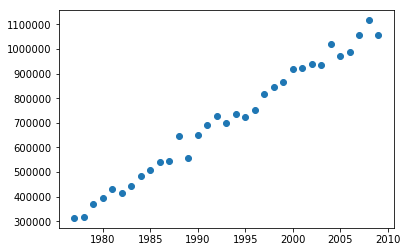

In [34]:
plt.scatter(t, sector4_AZ['Data'].values[17:])
plt.show()

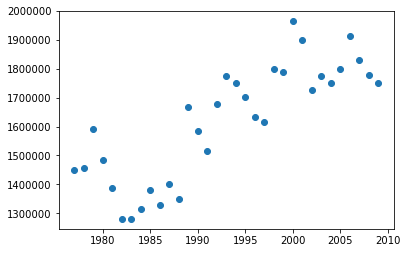

In [35]:
plt.scatter(t, sector4_CA['Data'].values[17:])
plt.show()

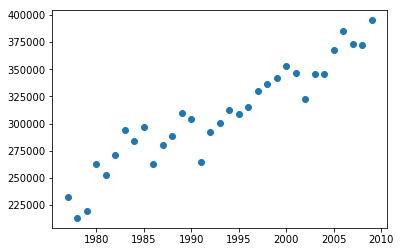

In [36]:
plt.scatter(t, sector4_NM['Data'].values[17:])
plt.show()

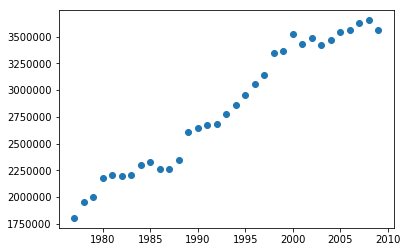

In [37]:
plt.scatter(t, sector4_TX['Data'].values[17:])
plt.show()

In [38]:
model_c4 = LinearRegression()
model_c4.fit(X, sector4)
model_c4.coef_

array([  0.13838908,  52.77110137])

In [39]:
model_c4.intercept_

572574.618771162

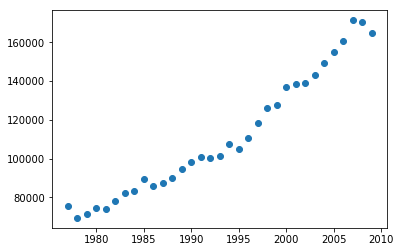

In [40]:
plt.scatter(t, sector5_AZ['Data'].values[17:])
plt.show()

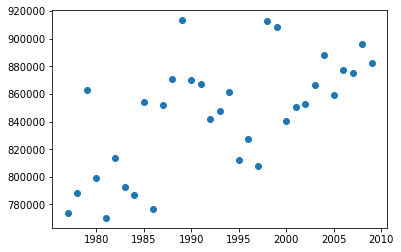

In [41]:
plt.scatter(t, sector5_CA['Data'].values[17:])
plt.show()

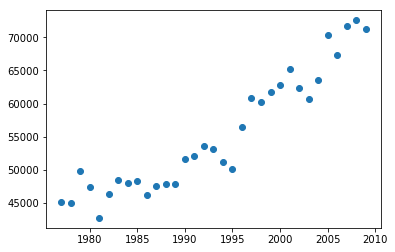

In [42]:
plt.scatter(t, sector5_NM['Data'].values[17:])
plt.show()

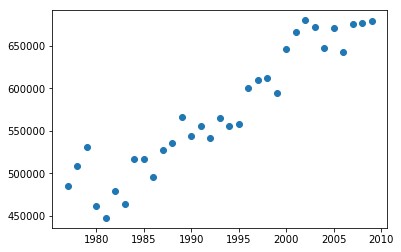

In [58]:
plt.scatter(t, sector5_TX['Data'].values[17:])
plt.show()

In [44]:
model_c5 = LinearRegression()
model_c5.fit(X, sector5)
model_c5.coef_

array([ -0.3659615 ,  42.01269171])

In [45]:
model_c5.intercept_

1375.1623983856407

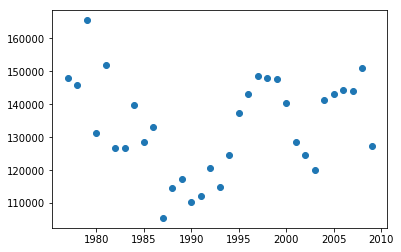

In [46]:
plt.scatter(t, sector1_AZ['Data'].values[17:])
plt.show()

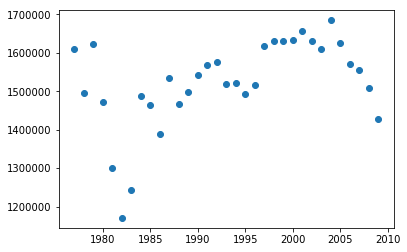

In [47]:
plt.scatter(t, sector1_CA['Data'].values[17:])
plt.show()

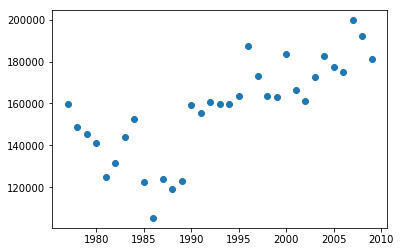

In [48]:
plt.scatter(t, sector1_NM['Data'].values[17:])
plt.show()

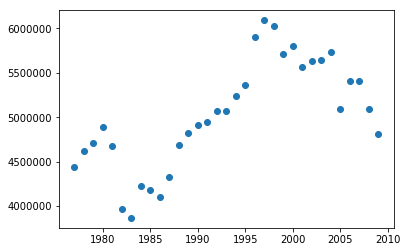

In [49]:
plt.scatter(t, sector1_TX['Data'].values[17:])
plt.show()

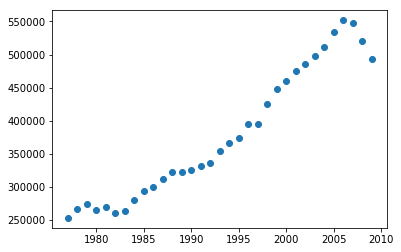

In [50]:
plt.scatter(t, sector2_AZ['Data'].values[17:])
plt.show()

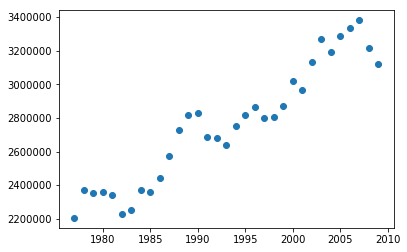

In [51]:
plt.scatter(t, sector2_CA['Data'].values[17:])
plt.show()

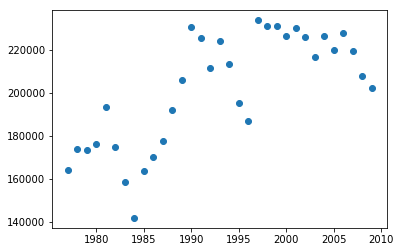

In [52]:
plt.scatter(t, sector2_NM['Data'].values[17:])
plt.show()

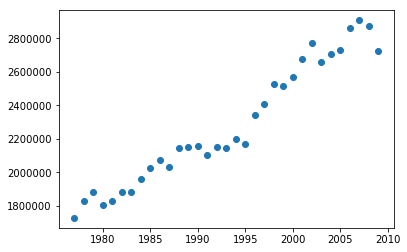

In [53]:
plt.scatter(t, sector2_TX['Data'].values[17:])
plt.show()

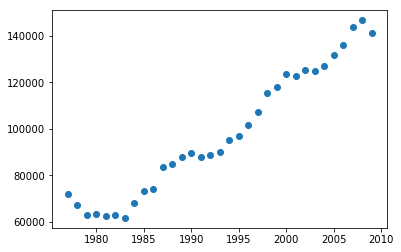

In [54]:
plt.scatter(t, sector3_AZ['Data'].values[17:])
plt.show()

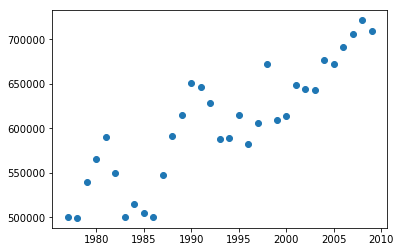

In [55]:
plt.scatter(t, sector3_CA['Data'].values[17:])
plt.show()

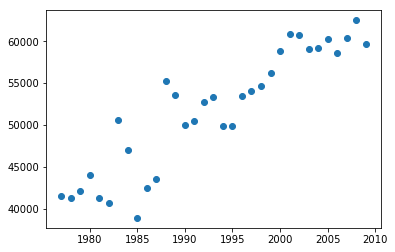

In [56]:
plt.scatter(t, sector3_NM['Data'].values[17:])
plt.show()

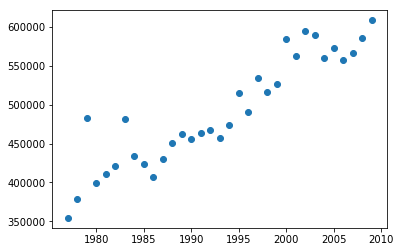

In [57]:
plt.scatter(t, sector3_TX['Data'].values[17:])
plt.show()

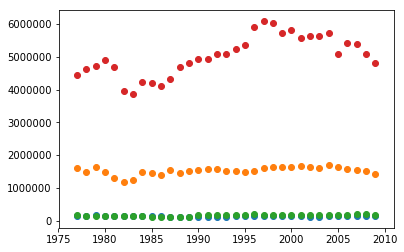

In [59]:
plt.scatter(t, sector1_AZ['Data'].values[17:])
plt.scatter(t, sector1_CA['Data'].values[17:])
plt.scatter(t, sector1_NM['Data'].values[17:])
plt.scatter(t, sector1_TX['Data'].values[17:])

plt.show()

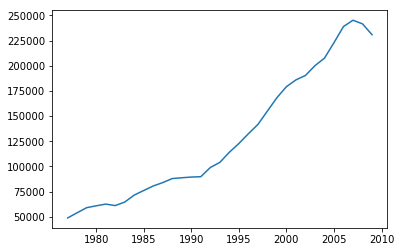

In [62]:
plt.plot(t, E_AZ['Data'].values)
plt.show()

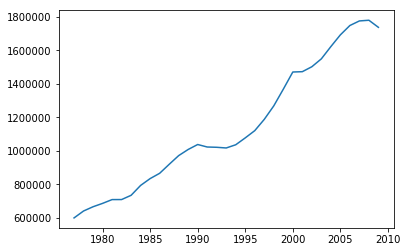

In [63]:
plt.plot(t, E_CA['Data'].values)
plt.show()

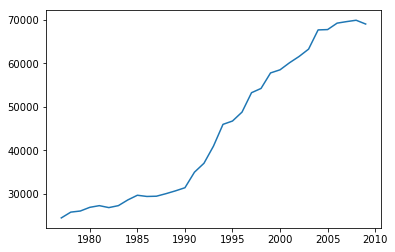

In [64]:
plt.plot(t, E_NM['Data'].values)
plt.show()

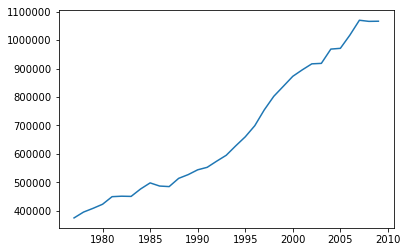

In [65]:
plt.plot(t, E_TX['Data'].values)
plt.show()

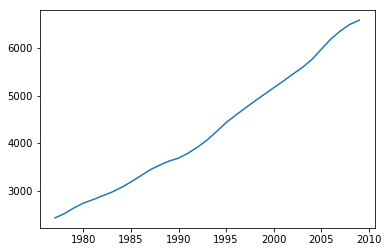

In [66]:
plt.plot(t, P_AZ['Data'].values[17:])
plt.show()

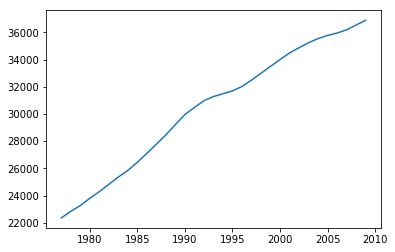

In [67]:
plt.plot(t, P_CA['Data'].values[17:])
plt.show()

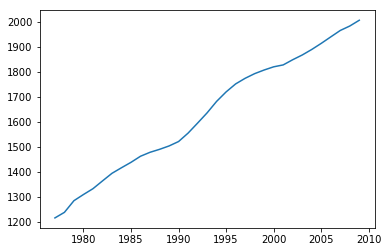

In [68]:
plt.plot(t, P_NM['Data'].values[17:])
plt.show()

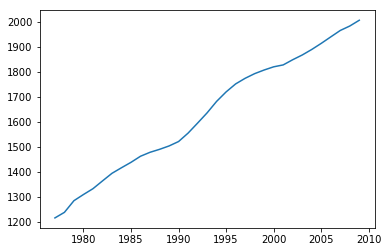

In [69]:
plt.plot(t, P_NM['Data'].values[17:])
plt.show()

In [78]:
A = np.array([[1, 0.2, 0.25], [5, 1, 0.5], [4, 2, 1]])

In [79]:
a, b = np.linalg.eig(A)

In [87]:
a

array([ 3.09401511+0.j        , -0.04700755+0.53728433j,
       -0.04700755-0.53728433j])

In [88]:
b

array([[ 0.15067977+0.j        , -0.07533988-0.13049251j,
        -0.07533988+0.13049251j],
       [ 0.55510902+0.j        , -0.27755451+0.48073851j,
        -0.27755451-0.48073851j],
       [ 0.81801564+0.j        ,  0.81801564+0.j        ,  0.81801564-0.j        ]])

In [82]:
ci = (a[0] - 3) / 2

In [83]:
ci / 0.58

(0.081047506918560761+0j)

In [84]:
ci

(0.04700755401276524+0j)

In [89]:
a1 = 0.15067977
a2 = 0.55510902
a3 = 0.81801564

In [90]:
a1/(a1+a2+a3)

0.09888392961293595

In [91]:
a2/(a1+a2+a3)

0.36429151213322036

In [92]:
a3/(a1+a2+a3)

0.5368245582538437